In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Step 3 - Clean Data

In [2]:
#prompts matplotlib visuals to appear in the notebook
%matplotlib inline

In [3]:
#set path
path = r'C:\Users\rtkel\Documents\Data Analytics Course\European Cities Airbnb Project\02 Data'

In [4]:
#import prepared dataset
df = pd.read_csv(os.path.join(path, 'Prepared Data','merged_df.csv'), index_col = False)

In [5]:
#check head
df.head()

,Unnamed: 0,City,Time of Week,Room Type,Room Shared,Room Private,Person Capacity,Multiple Rooms,Business Listing,Number of Bedrooms,...,Cleanliness Rating,Overall Guest Satisfaction Rating,Distance from City Centre,Distance from Nearest Metro Station,Attraction Index,Normalized Attraction Index,Restaurant Index,Normalized Restaurant Index,Longitude,Latitude
0,0,Amsterdam,Weekday,Private room,False,True,2.0,1,0,1,...,10.0,93.0,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,Amsterdam,Weekday,Private room,False,True,4.0,0,0,1,...,8.0,85.0,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,Amsterdam,Weekday,Private room,False,True,2.0,0,1,1,...,9.0,87.0,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,Amsterdam,Weekday,Private room,False,True,4.0,0,1,2,...,9.0,90.0,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,Amsterdam,Weekday,Private room,False,True,2.0,0,0,1,...,10.0,98.0,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [6]:
#delete unnecessary column
df = df.drop(columns=['Unnamed: 0'])

#### Step 4 - Explore Data Visually

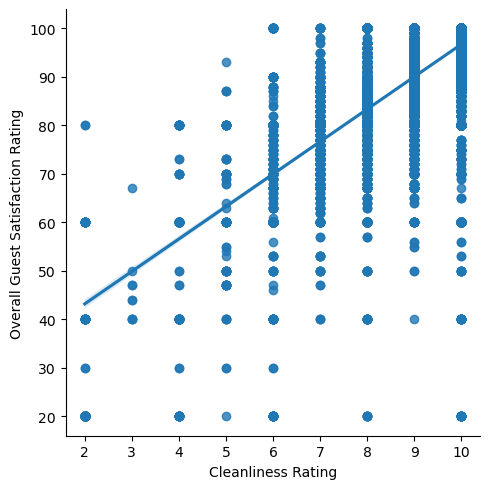

In [7]:
#create scatterplot for 'Cleanliness Rating' and 'Overall Guest Satisfaction Rating'
scatter_cr_gs = sns.lmplot(data=df, x="Cleanliness Rating", y = "Overall Guest Satisfaction Rating")

#### If the 'Cleanliness Rating' is higher, then the 'Overall Guest Satisfaction Rating' will also be higher, indicating a positive correlation between cleanliness ratings and overall guest satisfaction.

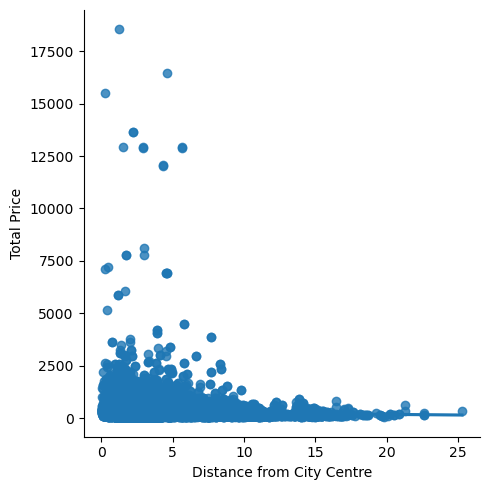

In [8]:
#create scatterplot for 'Distance from City Centre' and 'Total Price'
scatter_cc_tp = sns.lmplot(data=df, x="Distance from City Centre", y = "Total Price")

#### If a property is closer to the city center, then the 'Total Price' is likely to be lower, implying a negative correlation between 'Total Price' and 'Distance from City Centre,' suggesting that properties closer to the city center tend to have higher prices.

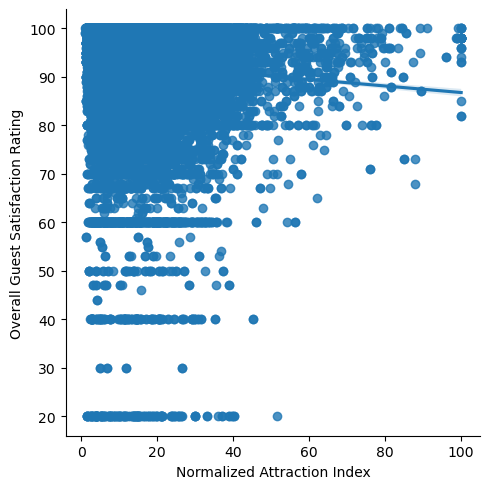

In [9]:
#create scatterplot for 'Normalized Attraction Index' and 'Overall Guest Satisfaction Rating'
scatter_ai_gs = sns.lmplot(data=df, x="Normalized Attraction Index", y = "Overall Guest Satisfaction Rating")

#### If we examine the impact of proximity to attractions on overall guest satisfaction across different European cities, then we will find significant differences, with variations attributed to city-specific factors.

#### Step 6 - Reshape Variables into NumPy arrays

In [10]:
#Reshape variables of with cleanliness rating being independent variable and overall guest satisfaction being the dependent varaible
x = df['Cleanliness Rating'].values.reshape(-1,1)
y = df['Overall Guest Satisfaction Rating'].values.reshape(-1,1)

In [11]:
x

array([[10.],
       [ 8.],
       [ 9.],
       ...,
       [10.],
       [10.],
       [10.]])

In [12]:
y

array([[93.],
       [85.],
       [87.],
       ...,
       [93.],
       [87.],
       [93.]])

#### Step 7 - Split Data into Two Sets

In [13]:
#Split datasets into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### Step 8 - Run Regression

In [14]:
#create regression object
regression = LinearRegression()

In [15]:
regression.fit(x_train, y_train)

LinearRegression()

In [16]:
#predict values of y using x
y_predicted = regression.predict(x_test)

#### Step 9 - Show Regression on Test Set

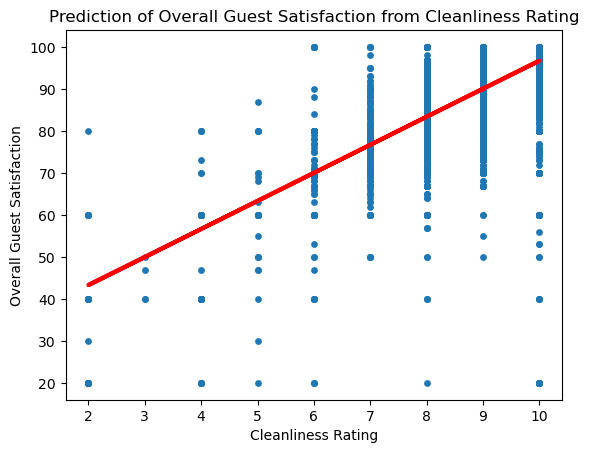

In [17]:
#create plot that shows regression line from model on test set
plot_test = plt
plot_test.scatter(x_test, y_test, s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Prediction of Overall Guest Satisfaction from Cleanliness Rating')
plot_test.xlabel('Cleanliness Rating')
plot_test.ylabel('Overall Guest Satisfaction')
plot_test.show()

#### Step 10 - Write Interpretation

#### The red regression line in the scatter plot indicates a reasonably good fit between Cleanliness Rating and Overall Guest Satisfaction in the test set. The line captures the general trend, suggesting that the model provides a satisfactory approximation of the data. Further assessment with statistical metrics would provide a more precise evaluation.

#### Step 11 - check model performance statistics.

In [18]:
#create objects for model summary statistics
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [19]:
#print summary statistics
print('Slope:', regression.coef_)
print('Mean squared error:' , mse)
print('R2 Score:', r2)

Slope: [[6.67705148]]
Mean squared error: 38.91705451467016
R2 Score: 0.5145177792650497


#### The linear regression model demonstrates a positive slope of 6.68, indicating a positive correlation between Cleanliness Rating and Overall Guest Satisfaction. With a mean squared error of 38.92, the model provides a reasonably good fit. The R2 score of 0.51 suggests that 51.45% of the variability in Overall Guest Satisfaction is explained by Cleanliness Rating. The red regression line aligns well with the data, capturing the trend. 

#### Step 12 - compare predicted vs actual values

In [20]:
#create dataframe comparing actual and predicted values of y
data_comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_comparison.head(11)

,Actual,Predicted
0,71.0,90.040728
1,99.0,96.717779
2,90.0,96.717779
3,73.0,76.686625
4,96.0,96.717779
5,80.0,83.363676
6,98.0,96.717779
7,94.0,90.040728
8,90.0,96.717779
9,99.0,96.717779


#### Step 13 - Further Analysis

#### The model appears to be fairly accurate in predicting cleanliness ratings based on the provided examples. While there are variations between actual and predicted values, the overall trend suggests that the model captures cleanliness ratings with reasonable accuracy. However,  if the training data contains biases, the model may inadvertently reflect and perpetuate those biases,